In [16]:
!pip install yfinance
!pip install bs4

In [17]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In this section, we define the function make_graph where input would be stock_data (which contains Date and Close columns), revenue_data (which contains Date and Revenue columns), and stock (which contains stock name).

In [18]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Question 1: Use yfinance to Extract Stock Data

Using the <em>yfinance.Ticker</em> function enter the ticker symbol of the stock for which we want to extract data. The stock is Tesla and its ticker symbol is **TSLA**.

In [19]:
tesla = yf.Ticker("TSLA")

Using <em>yf.Ticker.history</em> extract stock information in dataframe format and store it in tesla_data

In [20]:
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

Use the requests library to download the webpage\
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm \
Save the text of the response as a variable named html_data.


In [21]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text

Use BeautifulSoup to parse the html_data and store it in a variable name soup.

In [22]:
soup = BeautifulSoup(html_data,'html.parser')

Create empty dataframe telsa_revenue and traverse the table from soup using <em>soup.findall('table')</em>. Add each row except the header to the empty dataframe. Remove NaN data from the dataset.

In [23]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


# Question 3: Use yfinance to Extract Stock Data

Using the <em>yfinance.Ticker</em> function enter the ticker symbol of the stock for which we want to extract data. The stock is GameStop and its ticker symbol is **GME**.

In [24]:
gamestop = yf.Ticker("GME")

Using <em>yf.Ticker.history</em> extract stock information in dataframe format and store it in gme_data

In [25]:
gme_data=gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

Use the requests library to download the webpage\
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. \
Save the text of the response as a variable named html_data.


In [26]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data=requests.get(url).text

Use BeautifulSoup to parse the html_data and store it in a variable name soup.

In [27]:
soup = BeautifulSoup(html_data,'html.parser')

Create empty dataframe gme_revenue and traverse the table from soup using <em>soup.findall('table')</em>. Add each row except the header to the empty dataframe. Remove NaN data from the dataset.

In [28]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


# Question 5: Plot Tesla Stock Graph

Use the <em>make_graph</em> function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the <em>make_graph</em> function is <em>make_graph(tesla_data, tesla_revenue, 'Tesla')</em>.

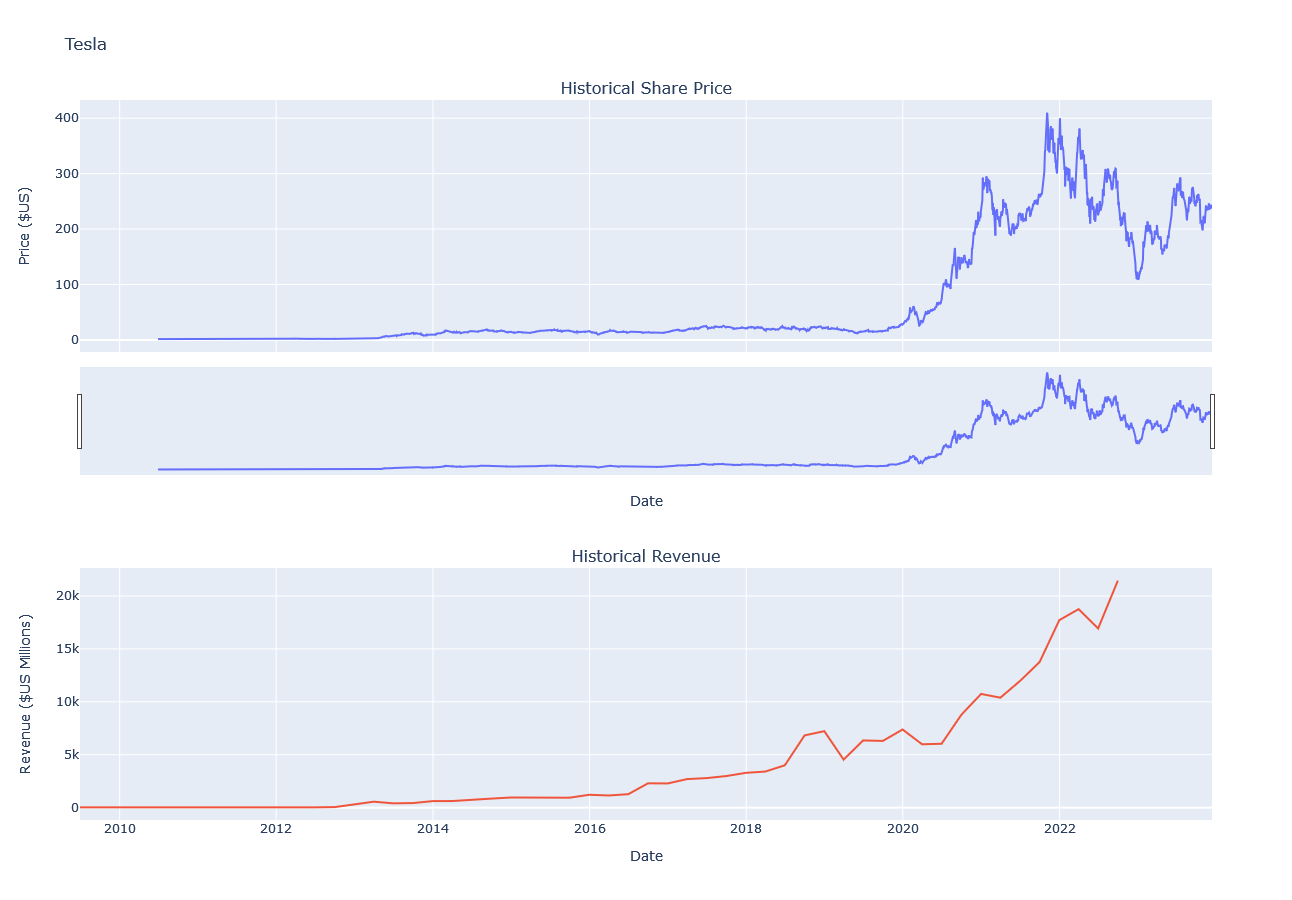

In [29]:
make_graph(tesla_data[['Date','Close']], tesla_revenue, 'Tesla')

# Question 6: Plot GameStop Stock Graph

Use the <em>make_graph</em> function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the <em>make_graph</em> function is <em>make_graph(gme_data, gme_revenue, 'GameStop')</em>.

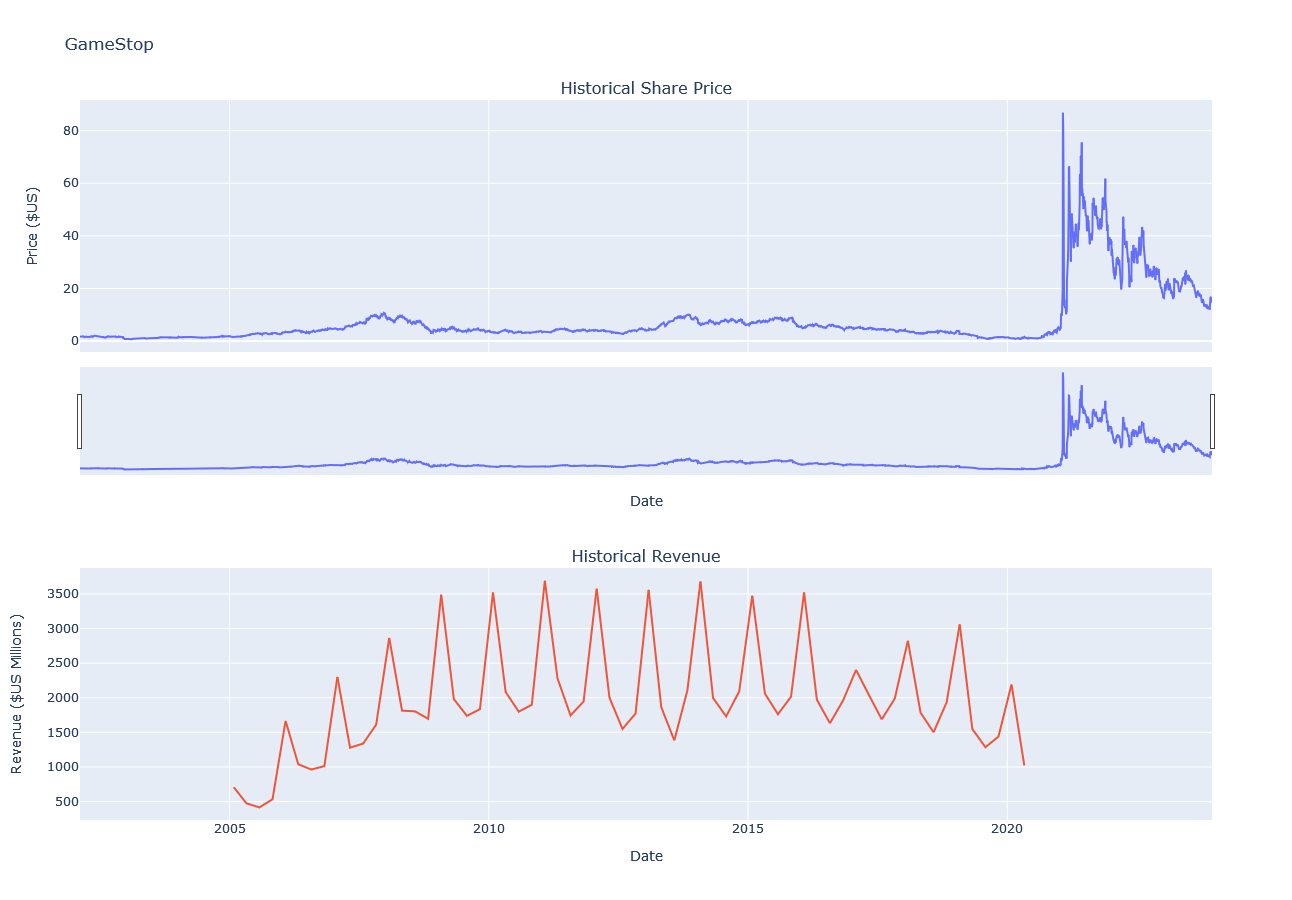

In [30]:
make_graph(gme_data[['Date','Close']], gme_revenue, 'GameStop')